# 1. Normalización y estandarización

Identificar la diferencia entre estandarización y normalización.



*   Aplicar la normalización (media=0, varianza=1) utilizando StandardScaler.
*   Aplicar la normalización min-max (valores escalados a [0, 1]) utilizando MinMaxScaler.
*   Hacer histogramas antes y después del escalado para visualizar las diferencias.

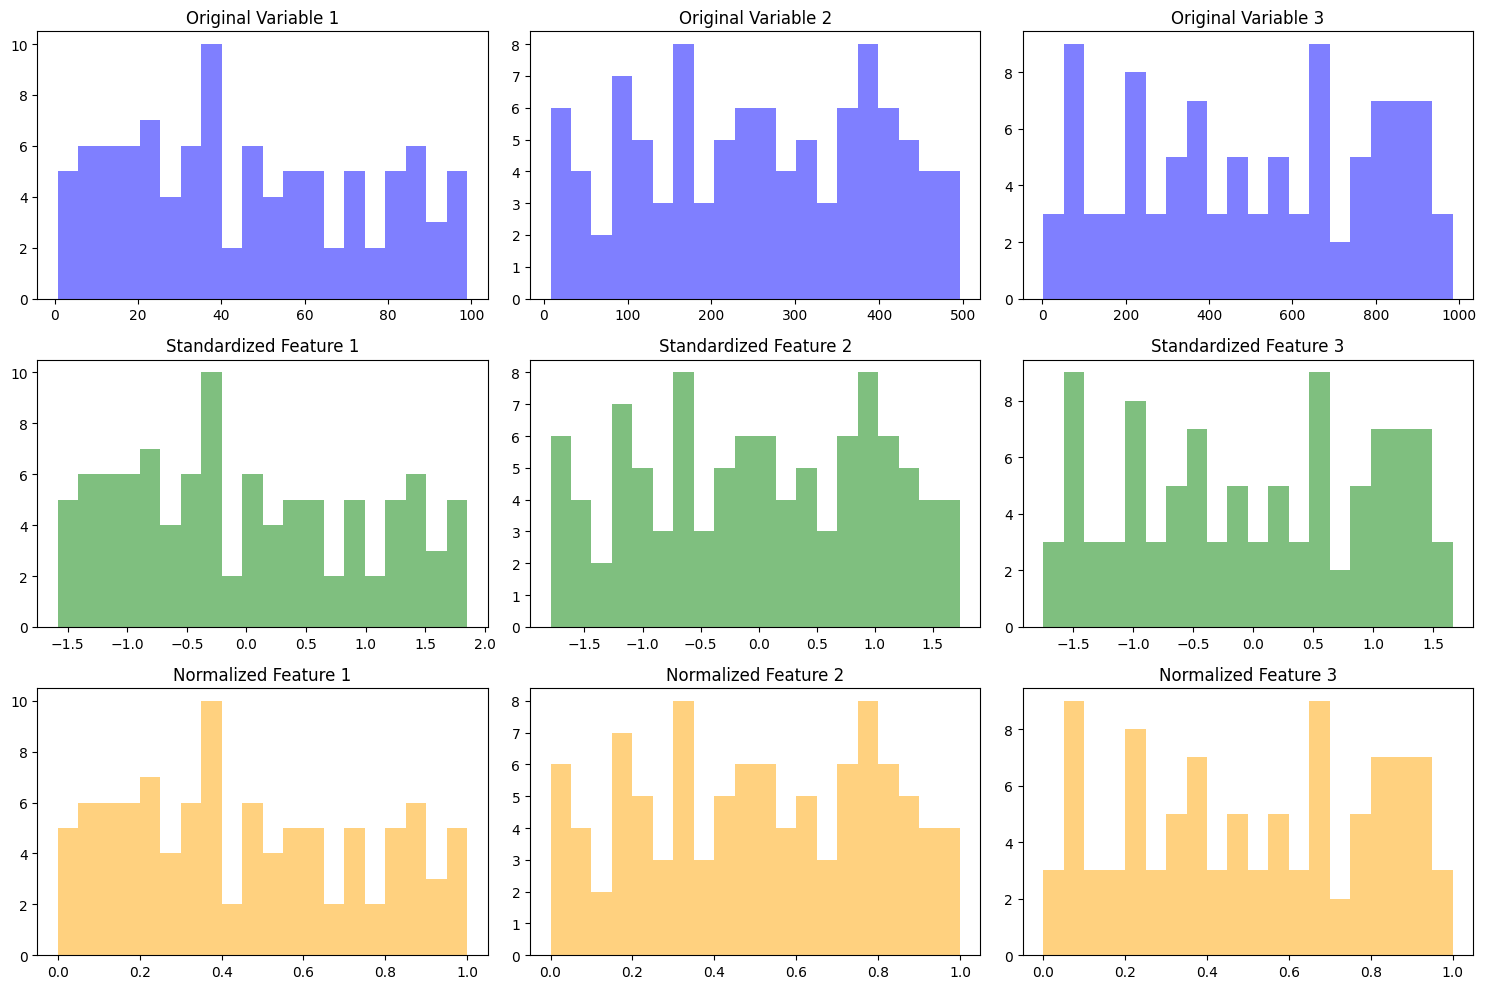

In [1]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Muestra de datos
np.random.seed(924)
data = np.random.rand(100, 3) * [100, 500, 1000]

# Estandarización
scaler_standard = StandardScaler()
data_standard = scaler_standard.fit_transform(data)

# Normalización
scaler_minmax = MinMaxScaler()
data_minmax = scaler_minmax.fit_transform(data)

# Histogramas
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for i in range(3):
    axes[0, i].hist(data[:, i], bins=20, alpha=0.5, color='blue')
    axes[0, i].set_title(f'Original Variable {i+1}')

    axes[1, i].hist(data_standard[:, i], bins=20, alpha=0.5, color='green')
    axes[1, i].set_title(f'Standardized Feature {i+1}')

    axes[2, i].hist(data_minmax[:, i], bins=20, alpha=0.5, color='orange')
    axes[2, i].set_title(f'Normalized Feature {i+1}')

plt.tight_layout()
plt.show()

# 2. PCA (Análisis de Componentes Principales)

Ejemplificar la reducción de características y la proyección de datos.

Dado un conjunto de datos 10D.
*   Aplicar PCA para reducir la dimensionalidad de 10 a 2.
*   Trazar la proyección 2D de los datos y explicar la varianza capturada por los componentes principales.

In [2]:
import numpy as np
from sklearn.datasets import make_blobs

n_samples = 50000

dim = 10
X, y = make_blobs(n_samples=n_samples,n_features = dim, shuffle=False, random_state=42)


In [3]:
import plotly.express as px
fig = px.scatter_3d(X, x=3, y=4, z=5, color=y, opacity=0.7)
fig.show()

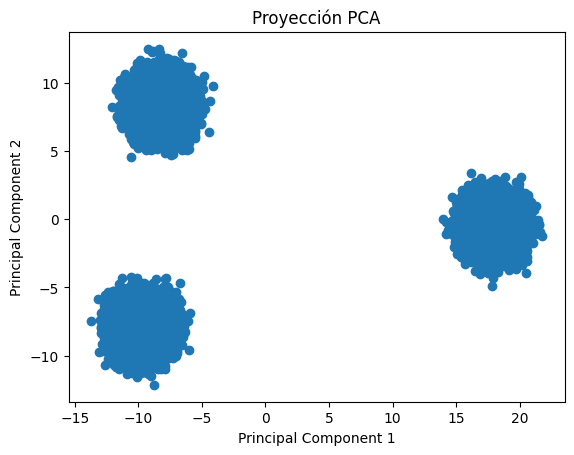

Razón de Varianza Acumulada: [0.75117221 0.21141468 0.00476726 0.00475249 0.00470669]


In [4]:
from sklearn.decomposition import PCA, KernelPCA
np.random.seed(754)
n_components = 5
pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(X)

plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.title('Proyección PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

print("Razón de Varianza Acumulada:", pca.explained_variance_ratio_)


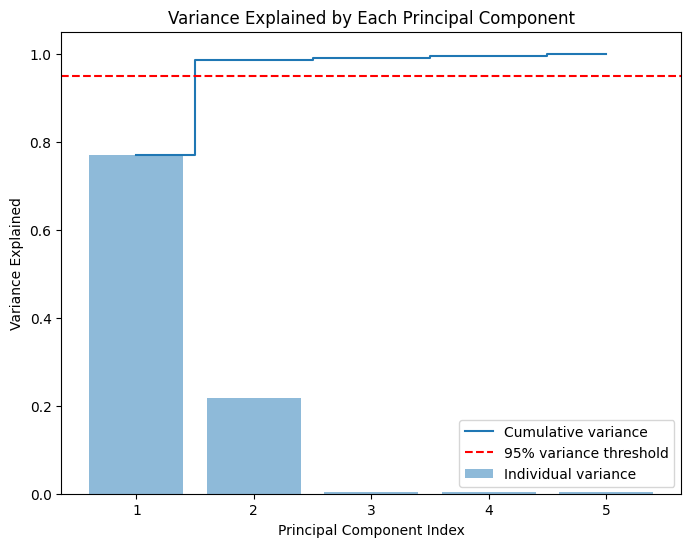

In [5]:
# Los eigenvalores nos dan la varianza acumulada
eigen_vals = pca.explained_variance_

# Varianza total
tot = sum(eigen_vals)
var_exp = [ev/tot for ev in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(8, 6))

# Varianza explicada
plt.bar(range(1, n_components + 1), var_exp, alpha=0.5, align='center', label='Individual variance')

# Varianza acumulada
plt.step(range(1, n_components + 1), cum_var_exp, where='mid', label='Cumulative variance')

# Línea de corte
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance threshold')

plt.xlabel('Principal Component Index')
plt.ylabel('Variance Explained')
plt.title('Variance Explained by Each Principal Component')
plt.legend(loc='best')

plt.show()


# 3. LDA (Análisis Lineal Discriminante)

Objetivo: Mostrar cómo LDA reduce la dimensionalidad mientras considera las etiquetas de clase.

Dado un conjunto de datos etiquetados (con dos o más clases).
*   Aplicar LDA para reducir el conjunto de datos a 1 dimensión.
*   Graficar el resultado y explicar cómo LDA preserva la separabilidad de las clases.

In [6]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
df = pd.DataFrame(data['data'],columns=data['feature_names'])

In [7]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df),columns=data['feature_names'])

df.head()
df['status'] = data['target']

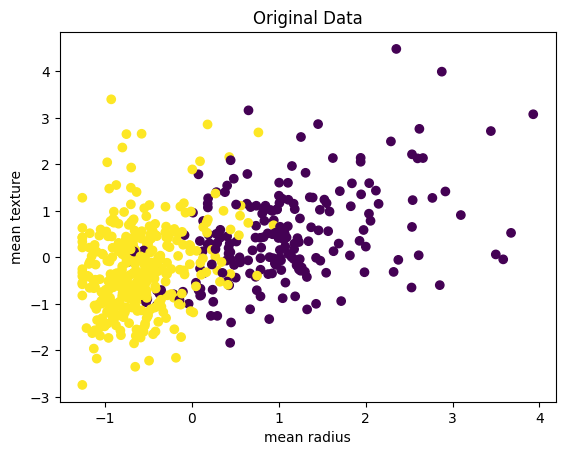

In [8]:
xi, yi = 7,8
plt.scatter(df.iloc[:,xi],df.iloc[:,yi],c=df['status'])
plt.title('Original Data')
plt.xlabel(f'{df.columns[0]}')
plt.ylabel(f'{df.columns[1]}')

plt.show()

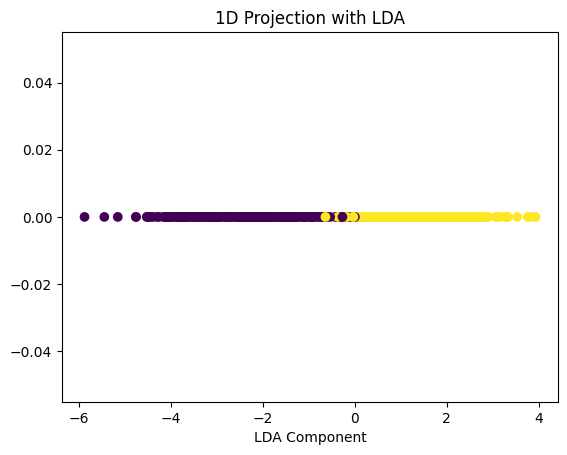

Razón de Varianza Explicada: [1.]


In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

data, labels = df.iloc[:,:-1], df.iloc[:,-1]

# Reducción a 1 dimensión
lda = LinearDiscriminantAnalysis(n_components=1)
data_lda = lda.fit_transform(data, labels)

plt.scatter(data_lda, np.zeros_like(data_lda), c=labels)
plt.title('1D Projection with LDA')
plt.xlabel('LDA Component')
plt.show()

# Razón de Varianza Explicada
print("Razón de Varianza Explicada:", lda.explained_variance_ratio_)


# Reconstrucción

En PCA, la reconstrucción es exactamente igual a la del componente original, si n_componentes es igual a la dimensión de las características originales. En cambio, Kernel PCA no mapea $\phi(x)$, sino un subespacio. Por lo tanto, la transformación inversa no siempre reconstruirá los datos, como en PCA. Podemos comprobarlo comparando la transformación inversa de Kernel PCA y PCA.

In [10]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Create the toy dataset
X, y = make_circles(n_samples=1000, factor=0.01, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [11]:
pca = PCA(n_components=2)
kernel_pca = KernelPCA( kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1)

X_pca = pca.fit_transform(X_train)
X_kpca = kernel_pca.fit_transform(X_train)

In [12]:
X_hat_kpca = kernel_pca.inverse_transform(kernel_pca.transform(X_test))
X_hat_pca = pca.inverse_transform(pca.transform(X_test))

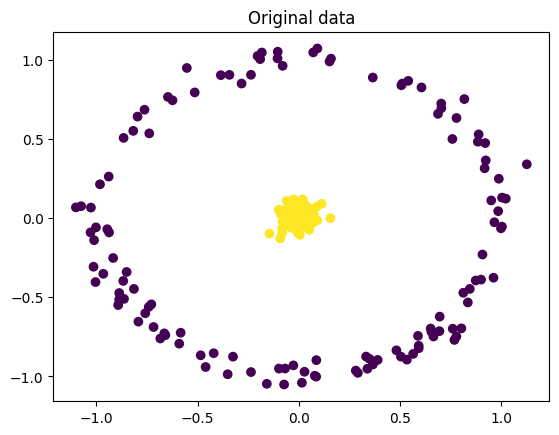

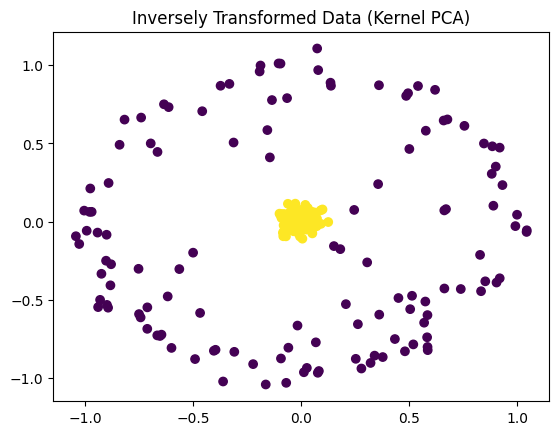

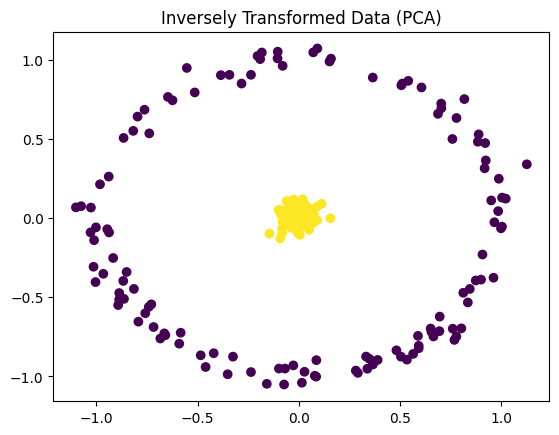

In [13]:
plt.scatter(X_test[:,0],X_test[:,1] ,c=y_test,cmap='viridis')
plt.title("Original data")
plt.show()

plt.scatter(X_hat_kpca[:,0],X_hat_kpca[:,1] ,c=y_test,cmap='viridis')
plt.title("Inversely Transformed Data (Kernel PCA)")
plt.show()

plt.scatter(X_hat_pca[:,0],X_hat_pca[:,1] ,c=y_test,cmap='viridis')
plt.title("Inversely Transformed Data (PCA)")
plt.show()

In [14]:
print("Mean squared error for Kernel PCA is:",((X_test-X_hat_kpca)**2).mean())
print("Mean squared error PCA is:" ,((X_test-X_hat_pca)**2).mean())

Mean squared error for Kernel PCA is: 0.011275231727641381
Mean squared error PCA is: 1.4617528040045885e-33


# 4. Kernel PCA

Mostrar cómo el PCA basado en kernel puede capturar relaciones no lineales.

Identificar diferencias entre PCA y K-PCA.



In [15]:
X_train_noisy = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/X_train_noisy.csv').to_numpy()
X_test_noisy = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/X_test_noisy.csv').to_numpy()

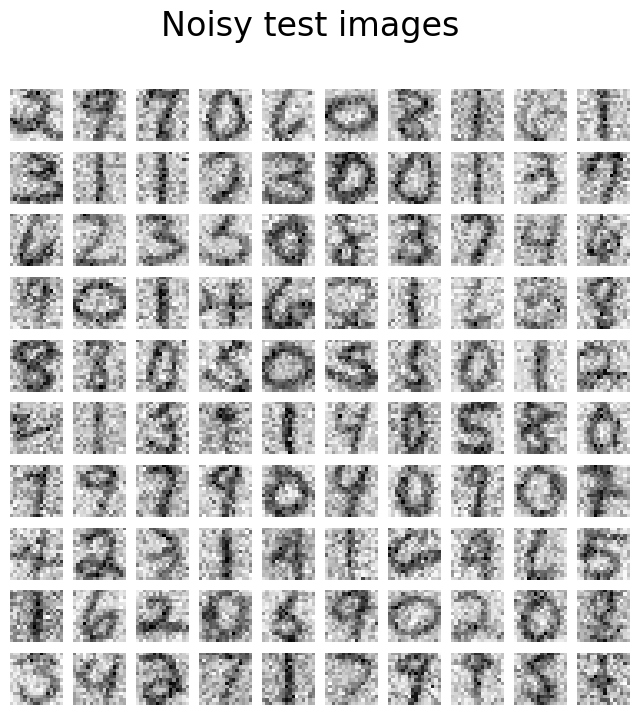

In [16]:
# Helper function for plotting the digit images
def plot_digits(X, title):
    """Small helper function to plot 100 digits."""
    fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((16, 16)), cmap="Greys")
        ax.axis("off")
    fig.suptitle(title, fontsize=24)

plot_digits(X_test_noisy, "Noisy test images")

In [17]:
pca = PCA(n_components=35)
pca.fit(X_train_noisy)

PCA(n_components=35)

In [18]:
kernel_pca = KernelPCA(n_components=400, kernel="rbf", gamma=0.01, fit_inverse_transform=True, alpha=0.1)
kernel_pca.fit(X_train_noisy)

KernelPCA(alpha=0.1, fit_inverse_transform=True, gamma=0.01, kernel='rbf',
          n_components=400)

Ahora, queremos ver si PCA o kernel PCA es mejor para eliminar el ruido en las imágenes originales.



In [19]:
X_hat_pca = pca.inverse_transform(pca.transform(X_test_noisy))
X_hat_kpca = kernel_pca.inverse_transform(kernel_pca.transform(X_test_noisy))

Visualizamos las imagenes reconstruidas con PCA y K-PCA

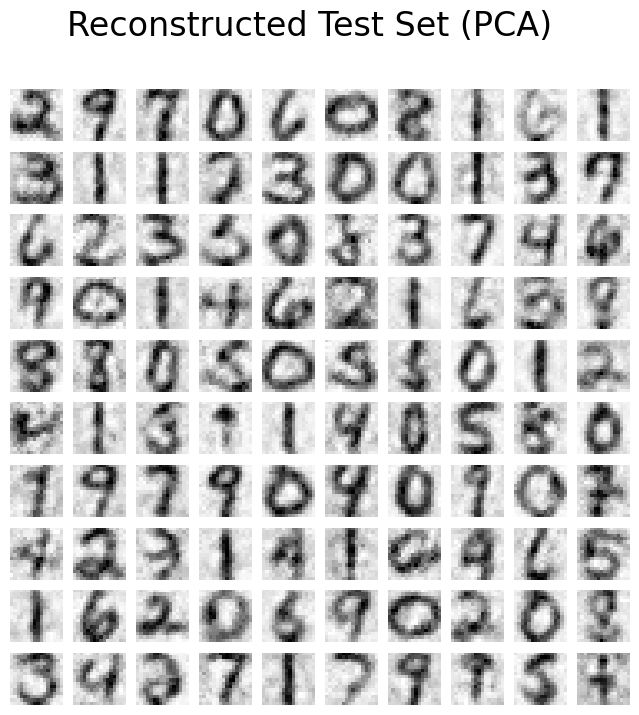

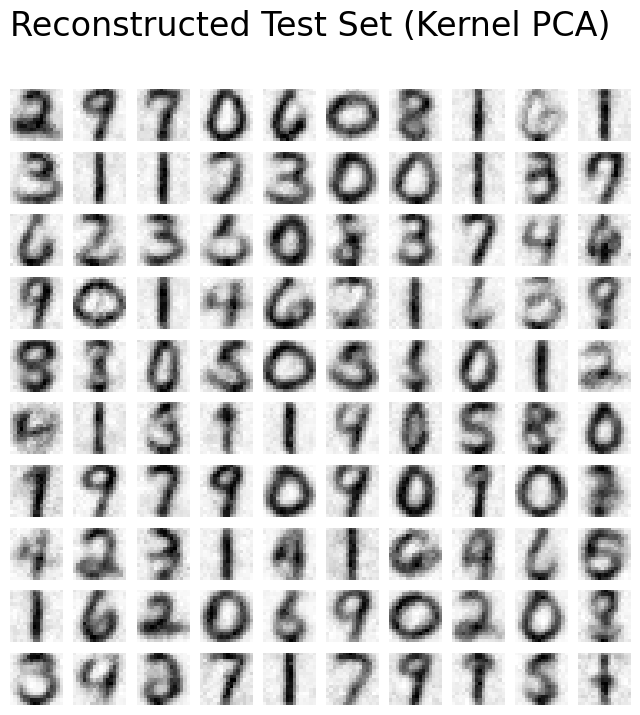

In [20]:
plot_digits(X_hat_pca, "Reconstructed Test Set (PCA)")
plot_digits(X_hat_kpca, "Reconstructed Test Set (Kernel PCA)")